In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier

from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
from sklearn.metrics import roc_auc_score,roc_curve
import warnings
%matplotlib inline
warnings.filterwarnings('ignore')

In [2]:
data1 = pd.read_csv('data/Heart Disease Dataset.csv')

In [3]:
data1.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,1,145,233,1,2,150,0,2.3,3,0,1,0
1,67,1,4,160,286,0,2,108,1,1.5,2,3,0,1
2,67,1,4,120,229,0,2,129,1,2.6,2,2,2,1
3,37,1,3,130,250,0,0,187,0,3.5,3,0,0,0
4,41,0,2,130,204,0,2,172,0,1.4,1,0,0,0


In [4]:
data1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 297 entries, 0 to 296
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       297 non-null    int64  
 1   sex       297 non-null    int64  
 2   cp        297 non-null    int64  
 3   trestbps  297 non-null    int64  
 4   chol      297 non-null    int64  
 5   fbs       297 non-null    int64  
 6   restecg   297 non-null    int64  
 7   thalach   297 non-null    int64  
 8   exang     297 non-null    int64  
 9   oldpeak   297 non-null    float64
 10  slope     297 non-null    int64  
 11  ca        297 non-null    int64  
 12  thal      297 non-null    int64  
 13  target    297 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 32.6 KB


In [5]:
data1.shape

(297, 14)

In [6]:
data1.index

RangeIndex(start=0, stop=297, step=1)

In [7]:
data1.columns

Index(['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope', 'ca', 'thal', 'target'],
      dtype='object')

In [8]:
data1.isna()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
292,False,False,False,False,False,False,False,False,False,False,False,False,False,False
293,False,False,False,False,False,False,False,False,False,False,False,False,False,False
294,False,False,False,False,False,False,False,False,False,False,False,False,False,False
295,False,False,False,False,False,False,False,False,False,False,False,False,False,False


In [9]:
data1.isna().any()

age         False
sex         False
cp          False
trestbps    False
chol        False
fbs         False
restecg     False
thalach     False
exang       False
oldpeak     False
slope       False
ca          False
thal        False
target      False
dtype: bool

In [10]:
data1.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [11]:
data1.duplicated().any()

False

In [12]:
data2 = data1.drop_duplicates()

In [13]:
data1.shape, data2.shape

((297, 14), (297, 14))

In [14]:
data2.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000
mean,54.542088,0.676768,3.158249,131.693603,247.350168,0.144781,0.996633,149.599327,0.326599,1.055556,1.602694,0.676768,0.835017,0.461279
std,9.049736,0.468500,0.964859,17.762806,51.997583,0.352474,0.994914,22.941562,0.469761,1.166123,0.618187,0.938965,0.956690,0.499340
min,29.000000,0.000000,1.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000
25%,48.000000,0.000000,3.000000,120.000000,211.000000,0.000000,0.000000,133.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000
50%,56.000000,1.000000,3.000000,130.000000,243.000000,0.000000,1.000000,153.000000,0.000000,0.800000,2.000000,0.000000,0.000000,0.000000
75%,61.000000,1.000000,4.000000,140.000000,276.000000,0.000000,2.000000,166.000000,1.000000,1.600000,2.000000,1.000000,2.000000,1.000000
max,77.000000,1.000000,4.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,3.000000,3.000000,2.000000,1.000000


相关性比较


<AxesSubplot:>

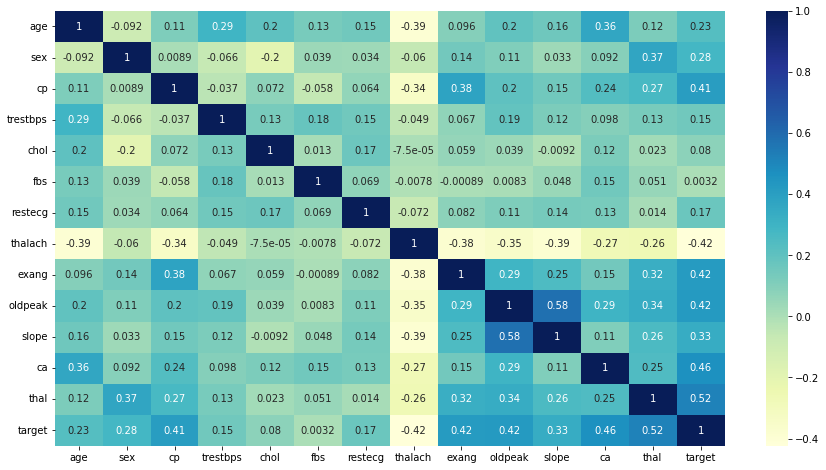

In [15]:
print('相关性比较')
plt.figure(figsize = (15,8))
sns.heatmap(data2.corr(),annot=True,cmap='YlGnBu')

In [16]:
data2

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,1,145,233,1,2,150,0,2.3,3,0,1,0
1,67,1,4,160,286,0,2,108,1,1.5,2,3,0,1
2,67,1,4,120,229,0,2,129,1,2.6,2,2,2,1
3,37,1,3,130,250,0,0,187,0,3.5,3,0,0,0
4,41,0,2,130,204,0,2,172,0,1.4,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
292,57,0,4,140,241,0,0,123,1,0.2,2,0,2,1
293,45,1,1,110,264,0,0,132,0,1.2,2,0,2,1
294,68,1,4,144,193,1,0,141,0,3.4,2,2,2,1
295,57,1,4,130,131,0,0,115,1,1.2,2,1,2,1


<AxesSubplot:xlabel='age', ylabel='count'>

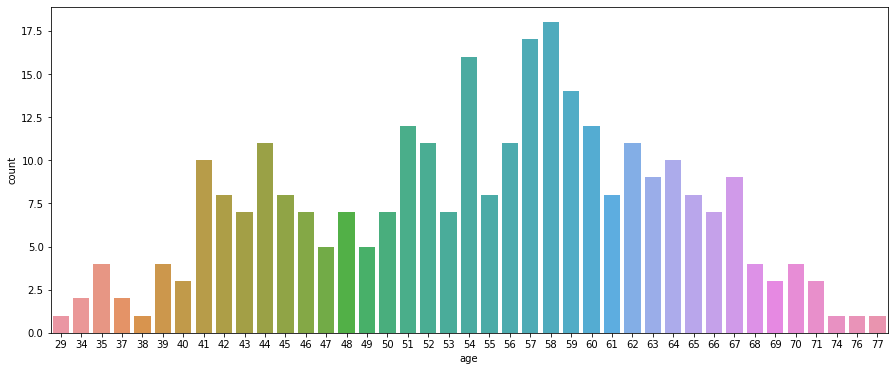

In [17]:
plt.figure(figsize=(15,6))
sns.countplot(x=data1['age'])

<AxesSubplot:xlabel='target', ylabel='count'>

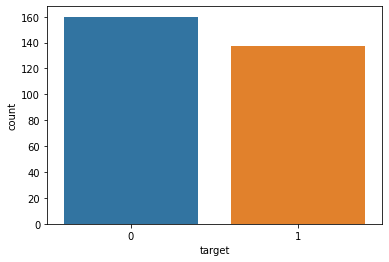

In [18]:
sns.countplot(x='target',data=data2)

<AxesSubplot:xlabel='sex', ylabel='count'>

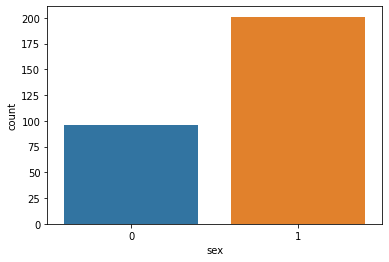

In [19]:
sns.countplot(x='sex', data=data2)

<AxesSubplot:xlabel='age', ylabel='Density'>

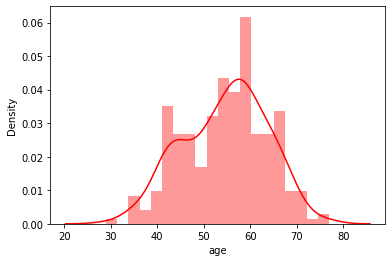

In [20]:
sns.distplot(data1['age'],color ='red',bins=20)

<AxesSubplot:xlabel='thalach', ylabel='Density'>

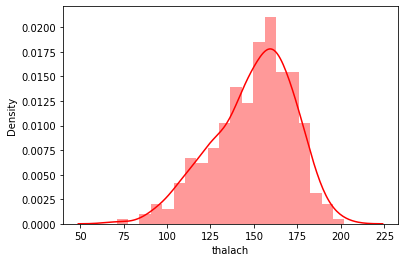

In [21]:
sns.distplot(data1['thalach'],color ='red',bins=20)

<AxesSubplot:xlabel='chol', ylabel='Density'>

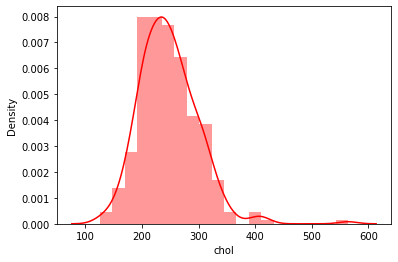

In [22]:
sns.distplot(data1['chol'],color ='red',bins=20)

## 删除离群点

<AxesSubplot:>

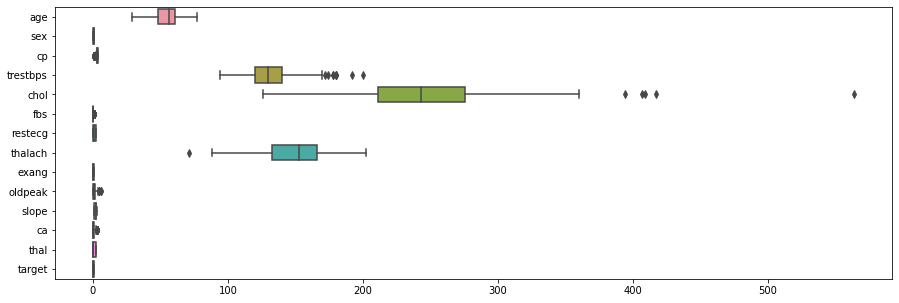

In [23]:
plt.figure(figsize=(15,5))
sns.boxplot(data=data2,orient='h')

In [24]:
data2.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000
mean,54.542088,0.676768,3.158249,131.693603,247.350168,0.144781,0.996633,149.599327,0.326599,1.055556,1.602694,0.676768,0.835017,0.461279
std,9.049736,0.468500,0.964859,17.762806,51.997583,0.352474,0.994914,22.941562,0.469761,1.166123,0.618187,0.938965,0.956690,0.499340
min,29.000000,0.000000,1.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000
25%,48.000000,0.000000,3.000000,120.000000,211.000000,0.000000,0.000000,133.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000
50%,56.000000,1.000000,3.000000,130.000000,243.000000,0.000000,1.000000,153.000000,0.000000,0.800000,2.000000,0.000000,0.000000,0.000000
75%,61.000000,1.000000,4.000000,140.000000,276.000000,0.000000,2.000000,166.000000,1.000000,1.600000,2.000000,1.000000,2.000000,1.000000
max,77.000000,1.000000,4.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,3.000000,3.000000,2.000000,1.000000


outliers on right side in chol is 
 48     417
120    407
151    564
171    394
179    409
Name: chol, dtype: int64 



<AxesSubplot:xlabel='chol'>

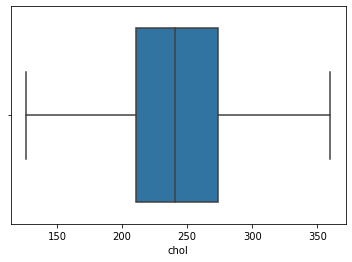

In [25]:
q1 = data2.chol.quantile(0.25)
q3 = data2.chol.quantile(0.75)
IQR = q3 - q1
lower_limit = q1 - 1.5 * IQR
upper_limit = q3 + 1.5 * IQR
k1=data2[data2["chol"]>upper_limit]
print("outliers on right side in chol is \n",k1["chol"],"\n")
data2=data2[data2["chol"]<upper_limit]
sns.boxplot(data2["chol"])

In [26]:
data2.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,292.000000,292.000000,292.000000,292.000000,292.000000,292.000000,292.000000,292.000000,292.000000,292.000000,292.000000,292.000000,292.000000,292.000000
mean,54.404110,0.688356,3.150685,131.623288,244.082192,0.143836,0.979452,149.496575,0.328767,1.041096,1.599315,0.667808,0.828767,0.462329
std,9.051649,0.463960,0.969234,17.841856,45.218752,0.351525,0.994619,23.119962,0.470572,1.161654,0.620719,0.932014,0.955070,0.499435
min,29.000000,0.000000,1.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000
25%,47.750000,0.000000,3.000000,120.000000,211.000000,0.000000,0.000000,132.750000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000
50%,55.500000,1.000000,3.000000,130.000000,240.500000,0.000000,0.000000,152.000000,0.000000,0.800000,2.000000,0.000000,0.000000,0.000000
75%,61.000000,1.000000,4.000000,140.000000,274.000000,0.000000,2.000000,166.000000,1.000000,1.600000,2.000000,1.000000,2.000000,1.000000
max,77.000000,1.000000,4.000000,200.000000,360.000000,1.000000,2.000000,202.000000,1.000000,6.200000,3.000000,3.000000,2.000000,1.000000


<AxesSubplot:>

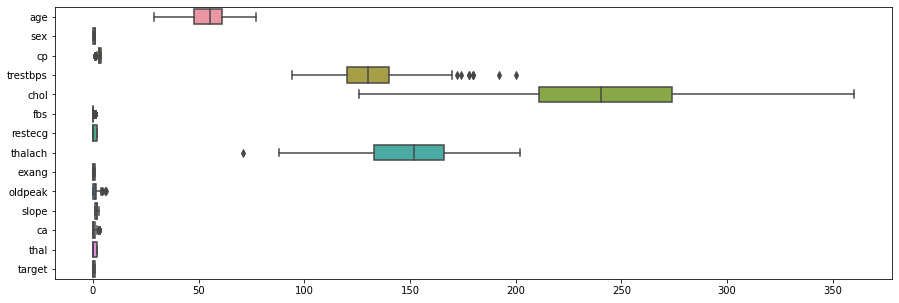

In [27]:
plt.figure(figsize=(15,5))
sns.boxplot(data=data2,orient='h')

<AxesSubplot:xlabel='trestbps'>

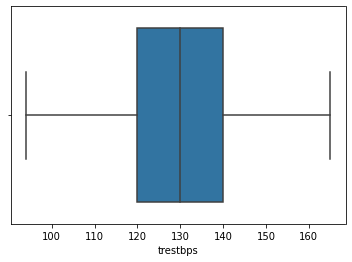

In [28]:
q1 = data2.trestbps.quantile(0.25)
q3 = data2.trestbps.quantile(0.75)
IQR = q3 - q1
lower_limit = q1 - 1.5 * IQR
upper_limit = q3 + 1.5 * IQR
k1=data2[data2["chol"] > upper_limit]
data2=data2[data2["trestbps"] < upper_limit]
sns.boxplot(data2["trestbps"])

<AxesSubplot:>

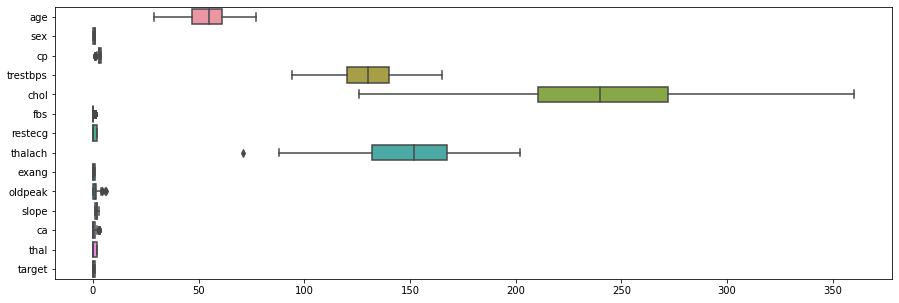

In [29]:
plt.figure(figsize=(15,5))
sns.boxplot(data=data2,orient='h')

<AxesSubplot:xlabel='thalach'>

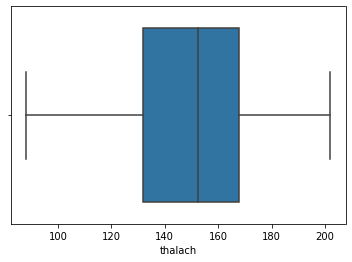

In [30]:
q1 = data2.thalach.quantile(0.25)
q3 = data2.thalach.quantile(0.75)
IQR = q3 - q1
lower_limit = q1 - 1.5 * IQR
k1=data2[data2["thalach"] < lower_limit]
data2=data2[data2["thalach"] > lower_limit]
sns.boxplot(data2["thalach"])

<AxesSubplot:>

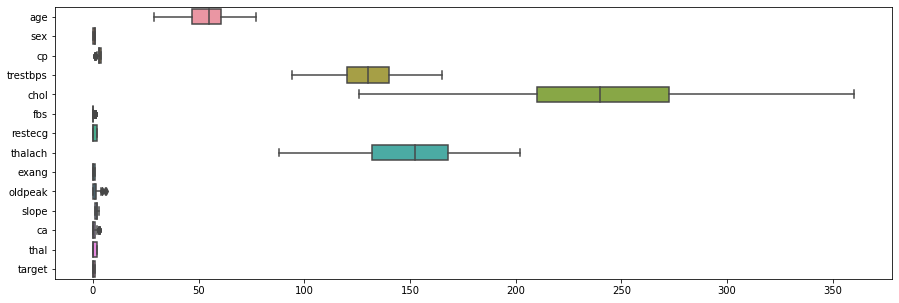

In [31]:
plt.figure(figsize=(15,5))
sns.boxplot(data=data2,orient='h')

In [32]:
data2.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,278.000000,278.000000,278.000000,278.000000,278.000000,278.000000,278.000000,278.000000,278.000000,278.000000,278.000000,278.000000,278.000000,278.000000
mean,54.122302,0.694245,3.154676,129.496403,242.899281,0.133094,0.967626,149.705036,0.316547,1.011871,1.579137,0.676259,0.802158,0.449640
std,9.122480,0.461558,0.954467,14.994764,45.144580,0.340288,0.995855,22.900965,0.465968,1.131643,0.612030,0.936356,0.950240,0.498355
min,29.000000,0.000000,1.000000,94.000000,126.000000,0.000000,0.000000,88.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000
25%,47.000000,0.000000,3.000000,120.000000,210.250000,0.000000,0.000000,132.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000
50%,55.000000,1.000000,3.000000,130.000000,240.000000,0.000000,0.000000,152.500000,0.000000,0.750000,2.000000,0.000000,0.000000,0.000000
75%,60.750000,1.000000,4.000000,140.000000,272.500000,0.000000,2.000000,167.750000,1.000000,1.600000,2.000000,1.000000,2.000000,1.000000
max,77.000000,1.000000,4.000000,165.000000,360.000000,1.000000,2.000000,202.000000,1.000000,6.200000,3.000000,3.000000,2.000000,1.000000


In [33]:
data2.shape

(278, 14)

## Data Splitting & Standardization

In [34]:
x = data2.drop('target',axis=1)
y = data2['target']

In [35]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.20,random_state=42)

In [36]:
scaler = StandardScaler()
x_train = scaler.fit_transform(x_train)
x_train

array([[ 0.10638606, -1.4735768 ,  0.90584211, ...,  0.7250728 ,
         0.41053404,  1.27390078],
       [-0.33713891,  0.67862089, -0.15816291, ..., -0.93437217,
         0.41053404,  1.27390078],
       [-1.11330759,  0.67862089, -0.15816291, ..., -0.93437217,
        -0.70091178, -0.84449602],
       ...,
       [ 0.2172673 ,  0.67862089,  0.90584211, ...,  0.7250728 ,
         0.41053404, -0.84449602],
       [ 0.99343598, -1.4735768 ,  0.90584211, ...,  0.7250728 ,
        -0.70091178, -0.84449602],
       [ 0.32814854,  0.67862089, -0.15816291, ...,  0.7250728 ,
         0.41053404,  1.27390078]])

In [37]:
x_test = scaler.transform(x_test)
x_test

array([[ 6.60792258e-01,  6.78620893e-01,  9.05842110e-01,
        -8.35984109e-01, -2.91442535e-01,  2.74562589e+00,
        -9.97755374e-01,  5.13173413e-01,  1.42866927e+00,
         3.99512786e-01, -9.34372169e-01,  1.52197986e+00,
         1.27390078e+00],
       [-3.37138907e-01,  6.78620893e-01,  9.05842110e-01,
         6.80908166e-01,  3.96150035e-01, -3.64215680e-01,
         1.00678483e+00,  1.64242882e+00,  1.42866927e+00,
        -8.76628774e-01, -9.34372169e-01, -7.00911778e-01,
        -8.44496021e-01],
       [-8.91545109e-01, -1.47357680e+00,  9.05842110e-01,
         5.49004490e-01, -3.09726383e-03, -3.64215680e-01,
         1.00678483e+00,  1.65710210e-01,  1.42866927e+00,
        -8.76628774e-01,  7.25072803e-01, -7.00911778e-01,
        -8.44496021e-01],
       [-2.26257666e-01,  6.78620893e-01, -2.28617294e+00,
         1.47233022e+00,  1.21682504e+00,  2.74562589e+00,
        -9.97755374e-01,  1.29496562e+00, -6.99952060e-01,
         2.17206849e-01,  7.25072803e

## 方法1:DecisionTreeClassifier

In [38]:
DT = DecisionTreeClassifier()
DT.fit(x_train, y_train)
lr_pred = DT.predict(x_test)
pd.DataFrame(np.c_[y_test,lr_pred],columns=['Actual','Predicted']).head(7)

,Actual,Predicted
0,1,1
1,0,0
2,0,0
3,0,1
4,1,0
5,0,0
6,0,0


 Test Accuracy score :  67.86 %
Train Accuracy score :  100.0 %
----------------------
Classification Report
----------------------
              precision    recall  f1-score   support

           0       0.65      0.79      0.71        28
           1       0.73      0.57      0.64        28

    accuracy                           0.68        56
   macro avg       0.69      0.68      0.67        56
weighted avg       0.69      0.68      0.67        56



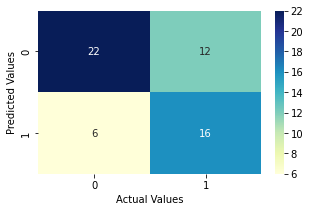

In [39]:
print(" Test Accuracy score : ",round(DT.score(x_test,y_test)*100,2),"%")
print("Train Accuracy score : ",round(DT.score(x_train,y_train)*100,2),"%")
print("----------------------")
print("Classification Report")
print("----------------------")
con = confusion_matrix(lr_pred,y_test)
plt.figure(figsize=(5,3))
sns.heatmap(con, annot=True,cmap="YlGnBu",fmt='g')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
print(classification_report(y_test,lr_pred))

## 方法2 Logistic Regression

In [40]:
lr = LogisticRegression()
lr.fit(x_train, y_train)

LogisticRegression()

In [41]:
lr_pred = lr.predict(x_test)
pd.DataFrame(np.c_[y_test,lr_pred],columns=['Actual','Predicted']).head(7)

,Actual,Predicted
0,1,1
1,0,0
2,0,0
3,0,0
4,1,0
5,0,0
6,0,0


 Test Accuracy score :  85.71 %
Train Accuracy score :  84.68 %
----------------------
Classification Report
----------------------
              precision    recall  f1-score   support

           0       0.79      0.96      0.87        28
           1       0.95      0.75      0.84        28

    accuracy                           0.86        56
   macro avg       0.87      0.86      0.86        56
weighted avg       0.87      0.86      0.86        56



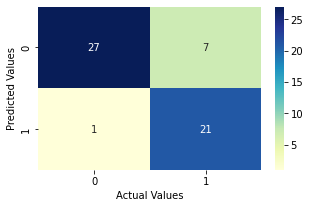

In [42]:
print(" Test Accuracy score : ",round(lr.score(x_test,y_test)*100,2),"%")
print("Train Accuracy score : ",round(lr.score(x_train,y_train)*100,2),"%")
print("----------------------")
print("Classification Report")
print("----------------------")
con = confusion_matrix(lr_pred,y_test)
plt.figure(figsize=(5,3))
sns.heatmap(con, annot=True,cmap="YlGnBu",fmt='g')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
print(classification_report(y_test,lr_pred))

In [43]:
auc = roc_auc_score(y_test,lr_pred)
auc

0.8571428571428571

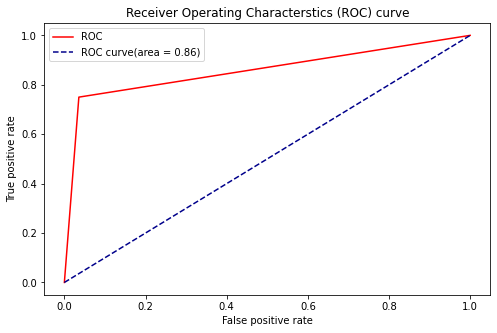

In [46]:
fpr, tpr, thresholds = roc_curve(y_test,lr_pred)
plt.figure(figsize=(8,5))
plt.plot(fpr , tpr , color='red',label='ROC')
plt.plot([0,1],[0,1],color = 'darkblue',linestyle='--',label='ROC curve(area = %0.2f)'% auc)
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('Receiver Operating Characterstics (ROC) curve')
plt.legend()
plt.show()

# 方法3 Random Forest

In [47]:
rfc = RandomForestClassifier(max_depth=4)
rfc.fit(x_train, y_train)

import pickle
#save model
f = open('saved_model/rfc.pickle','wb')
pickle.dump(rfc,f)
f.close()
#load model
f = open('saved_model/rfc.pickle','rb')
rfc1 = pickle.load(f)
f.close()

In [48]:
rfc_pred = rfc.predict(x_test)
pd.DataFrame(np.c_[y_test,rfc_pred],columns=['Actual','Predicted']).head()

,Actual,Predicted
0,1,1
1,0,0
2,0,0
3,0,0
4,1,0


 Test Accuracy score :  85.71 %
Train Accuracy score :  91.44 %
----------------------
Classification Report
----------------------
              precision    recall  f1-score   support

           0       0.79      0.96      0.87        28
           1       0.95      0.75      0.84        28

    accuracy                           0.86        56
   macro avg       0.87      0.86      0.86        56
weighted avg       0.87      0.86      0.86        56



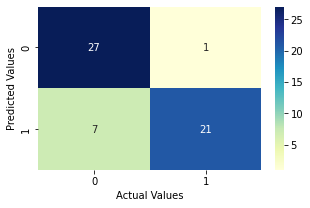

In [49]:
print(" Test Accuracy score : ",round(rfc.score(x_test,y_test)*100,2),"%")
print("Train Accuracy score : ",round(rfc.score(x_train,y_train)*100,2),"%")
clf_con = confusion_matrix(y_test,rfc_pred)
print("----------------------")
print("Classification Report")
print("----------------------")
print(classification_report(y_test,rfc_pred))
plt.figure(figsize=(5,3))
sns.heatmap(clf_con, annot=True,cmap="YlGnBu",fmt='g')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.show()

In [50]:
auc = roc_auc_score(y_test,rfc_pred)
auc

0.8571428571428571

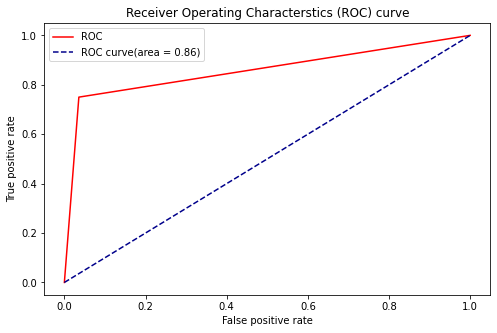

In [51]:
fpr, tpr, thresholds = roc_curve(y_test,rfc_pred)
plt.figure(figsize=(8,5))
plt.plot(fpr , tpr , color='red',label='ROC')
plt.plot([0,1],[0,1],color = 'darkblue',linestyle='--',label='ROC curve(area = %0.2f)'% auc)
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('Receiver Operating Characterstics (ROC) curve')
plt.legend()
plt.show()

# Model Comparison

In [52]:
data = { 'Models' : ['decision Tree','Logistic Regression','Random Forest'],
         'Test Accuracy' : [round(DT.score(x_test,y_test)*100,2),round(lr.score(x_test,y_test)*100,2), round(rfc.score(x_test,y_test)*100,2)],
         'Train Accuracy': [round(DT.score(x_train,y_train)*100,2), round(lr.score(x_train,y_train)*100,2),round(rfc.score(x_train,y_train)*100,2)],
       }

df = pd.DataFrame(data)
df.sort_values(by='Test Accuracy',ascending=False)

,Models,Test Accuracy,Train Accuracy
1,Logistic Regression,85.71,84.68
2,Random Forest,85.71,91.44
0,decision Tree,67.86,100.00


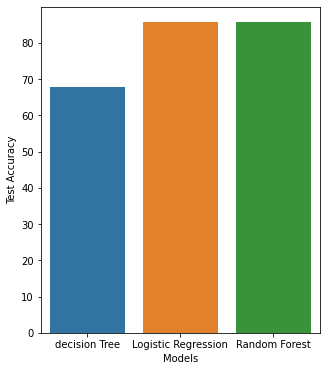

In [53]:
plt.figure(figsize = (5,6))
sns.barplot(x='Models', y='Test Accuracy',data=df)
plt.show()

## Data Testing

In [54]:
data2.head(25)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,1,145,233,1,2,150,0,2.3,3,0,1,0
1,67,1,4,160,286,0,2,108,1,1.5,2,3,0,1
2,67,1,4,120,229,0,2,129,1,2.6,2,2,2,1
3,37,1,3,130,250,0,0,187,0,3.5,3,0,0,0
4,41,0,2,130,204,0,2,172,0,1.4,1,0,0,0
5,56,1,2,120,236,0,0,178,0,0.8,1,0,0,0
6,62,0,4,140,268,0,2,160,0,3.6,3,2,0,1
7,57,0,4,120,354,0,0,163,1,0.6,1,0,0,0
8,63,1,4,130,254,0,2,147,0,1.4,2,1,2,1
9,53,1,4,140,203,1,2,155,1,3.1,3,0,2,1


In [55]:

sample1 = [45,1,0,104,208,0,0,148,1,3.0,1,0,2]
print('预测sample1：','->'*20, sample1)
if rfc.predict([sample1]) == 0:
    print('[SAFE] 未检测到心脏病')
else:
    print(' [WARNING] 检测到心脏病')

预测sample1： ->->->->->->->->->->->->->->->->->->->-> [45, 1, 0, 104, 208, 0, 0, 148, 1, 3.0, 1, 0, 2]
 [WARNING] 检测到心脏病


In [56]:
# sample2 = [45,1,0,104,208,0,0,148,1,3.0,1,0,2]
# if lr.predict([sample2]) == 0:
#     print('[SAFE] [SAFE] 未检测到心脏病')
# else:
#     print(' [WARNING] [SAFE] 检测到心脏病')